In [ ]:
import tensorflow as tf

In [ ]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 114s 59ms/step - loss: 0.3353 - accuracy: 0.8935 - val_loss: 0.1252 - val_accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1077 - accuracy: 0.9682 - val_loss: 0.0956 - val_accuracy: 0.9716
Epoch 3/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0743 - accuracy: 0.9778 - val_loss: 0.0678 - val_accuracy: 0.9785
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0588 - accuracy: 0.9821 - val_loss: 0.0589 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0421 - val_accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0618 - val_accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0581 

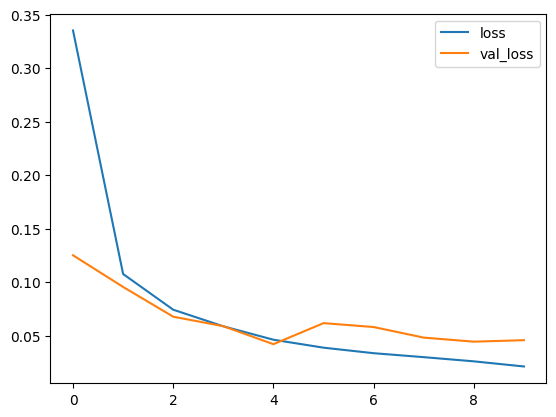

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

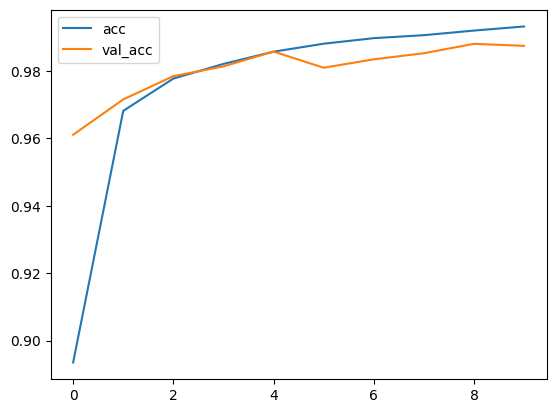

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 6s 15ms/step
Confusion matrix, without normalization
[[ 974    0    3    0    0    0    2    1    0    0]
 [   0 1126    2    0    0    1    4    2    0    0]
 [   2    0 1024    0    1    0    1    4    0    0]
 [   0    0    4  996    0    4    0    2    1    3]
 [   0    0    0    0  958    0    6    4    1   13]
 [   0    0    0    6    0  882    1    0    2    1]
 [   3    2    1    0    0    2  949    0    0    1]
 [   0    3    8    0    3    0    0 1011    0    3]
 [   0    1    3    2    1    2    0    3  958    4]
 [   0    0    2    0    4    2    0    4    0  997]]


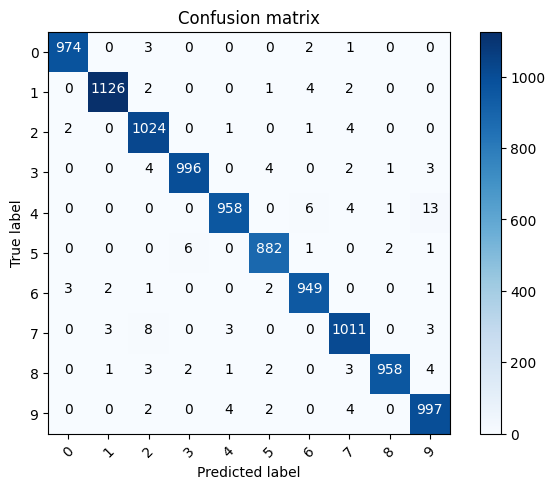

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

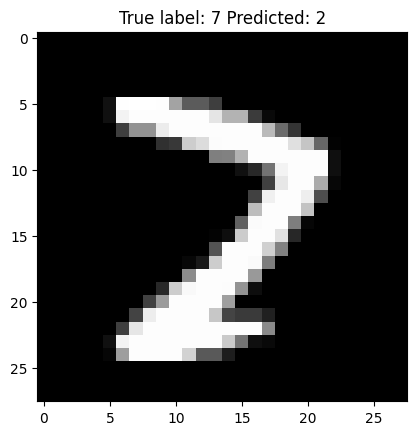

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));